# AstroPy Tutorial
This is a tutorial for incoming research students to get familiar with the kinds of things that you can utilize from this package. 

In [1]:
import astropy 

## FITS File Handling
There are a lot of opinions on what the best type of file extension is to use. However, in this group, we commonly use FITS files. This section will help you get a grasp on how to read these types of files and use them. 

To use the fits functionality from astropy, we need to import it

In [2]:
from astropy.io import fits

Now that we have the fits package imported, we need a file to open! We are going to open the file *spSpec-112359-59648-27021597910086737.fits* which should be in the directory or folder that this code is in!

In [3]:
dataFile = fits.open('spSpec-112359-59648-27021597910086737.fits')

In [4]:
print(dataFile)

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x7f853a7974d0>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853a7b9850>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853acf7a10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853ad05090>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853ad10650>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853ad1dc50>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853ad2b350>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853ad36a10>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853ad46090>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853ad50710>, <astropy.io.fits.hdu.table.BinTableHDU object at 0x7f853ad5ad50>]


FITS files can contain a myriad of different headers called HDU (Header Data Unit). You can call each header individually by typing:
```Python
dataFile[0]
```
which will call the primary HDU. Subsequently, typing:
```Python
dataFile[1]
``` 
will call the first extension HDU (if there are any) and so on and so forth.

We can quickly look at the structure of our FITS file by running the following command:

In [5]:
dataFile.info()

Filename: spSpec-112359-59648-27021597910086737.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     292   ()      
  1  COADD         1 BinTableHDU     34   4648R x 8C   [E, E, E, J, J, E, E, E]   
  2  PLUGMAP       1 BinTableHDU    152   1R x 67C   [9A, I, I, I, I, D, D, D, D, E, E, E, D, D, E, E, I, 5E, 11A, E, E, E, E, K, K, 10A, 17A, 7A, 13A, K, K, D, D, 18A, J, J, J, 16A, 5E, 5E, 5E, 5E, 5E, 5J, E, E, E, 4E, 3E, 2E, E, E, E, 13A, I, I, D, 79A, 87A, 31A, 87A, 63A, 63A, 63A, 47A, 55A, 39A]   
  3  MJD_EXP_59648-00    1 BinTableHDU    196   4648R x 8C   [E, E, E, J, J, E, E, E]   
  4  MJD_EXP_59648-01    1 BinTableHDU    194   4648R x 8C   [E, E, E, J, J, E, E, E]   
  5  MJD_EXP_59648-02    1 BinTableHDU    194   4648R x 8C   [E, E, E, J, J, E, E, E]   
  6  MJD_EXP_59648-03    1 BinTableHDU    198   4648R x 8C   [E, E, E, J, J, E, E, E]   
  7  MJD_EXP_59648-04    1 BinTableHDU    198   4648R x 8C   [E, E, E, J, J, E, E, E]   
  

We see that there is a **PRIMARY** HDU in the first row and there is a **CODADD** in the second row. These two are all we really need to focus on. 

Let's look at the *PrimaryHDU*. There are two components of an HDU that we need to be aware of:
1. Data
2. Header

In order to open these, we use the following commands:

```Python
dataFile[0].data #to open the data portion of the file
dataFile[0].header #to open the header portion of the file.
```

The *data* part of the FITS file is where the physical data is stored, such as flux, wavelength, etc. The *header* part of the the FITS file is where any technical information is getting stored such as where the object is located in the sky, the atmospheric conditions when it was observed, etc. 

Let's see what the data and header of the PrimaryHDU look like

In [6]:
dataFile[0].data

You can see that in the Primary HDU, there is nothing in the way of data. Nothing gets displayed! Now, let's look at the header.

In [7]:
dataFile[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
NAXIS1  =                 4648 /                                                
EXTEND  =                    T /                                                
TELESCOP= 'SDSS 2.5-M'         / Sloan Digital Sky Survey                       
V_BOSS  = '6.0.1   '           / Active version of the BOSS ICC                 
CAMDAQ  = '1.5.0:37'                                                            
SUBFRAME= '' / the subframe readout command                                     
ERRCNT  = '2       '                                                            
SYNCERR = 'NONE    '                                                            
SLINES  = 'NONE    '                                                            
PIXERR  = 'NONE    '        

You can see that there is a littany of information here and most of it does not concern us! To get a list of all the keywords in the header, we can use the following command:

In [8]:
headerKeyList = list(dataFile[0].header.keys())

headerKeyList

['SIMPLE',
 'BITPIX',
 'NAXIS',
 'NAXIS1',
 'EXTEND',
 'TELESCOP',
 'V_BOSS',
 'CAMDAQ',
 'SUBFRAME',
 'ERRCNT',
 'SYNCERR',
 'SLINES',
 'PIXERR',
 'PLINES',
 'PFERR',
 'DIDFLUSH',
 'FLAVOR',
 'MJD',
 'CARTID',
 'FIELDID',
 'VJAEGER',
 'VKAIJU',
 'VCOORDIO',
 'VCALIBS',
 'OBJSYS',
 'RA',
 'DEC',
 'EQUINOX',
 'RADECSYS',
 'RADEG',
 'DECDEG',
 'ROTTYPE',
 'ROTPOS',
 'BOREOFFX',
 'BOREOFFY',
 'ARCOFFX',
 'ARCOFFY',
 'CALOFFX',
 'CALOFFY',
 'CALOFFR',
 'GUIDOFFX',
 'GUIDOFFY',
 'GUIDOFFR',
 'FOCUS',
 'M2PISTON',
 'M2XTILT',
 'M2YTILT',
 'M2XTRAN',
 'M2YTRAN',
 'M2ZROT',
 'M1PISTON',
 'M1XTILT',
 'M1YTILT',
 'M1XTRAN',
 'M1YTRAN',
 'M1ZROT',
 'SCALE',
 'V_APO',
 'GUSTD',
 'TRUSTEMP',
 'WINDD25M',
 'WINDS25M',
 'SLITID1',
 'COLLA',
 'COLLB',
 'COLLC',
 'HARTMANN',
 'MC1HUMHT',
 'MC1HUMCO',
 'MC1TEMDN',
 'MC1THT',
 'MC1TRCB',
 'MC1TRCT',
 'MC1TBCB',
 'MC1TBCT',
 'NEXP',
 'BESTEXP',
 'EXPID01',
 'EXPID02',
 'EXPID03',
 'EXPID04',
 'EXPID05',
 'EXPID06',
 'EXPID07',
 'EXPID08',
 'EXPID09',
 'EX

Let's figure out where this object is in the sky by determining it's RA (Right Ascension) and Dec (Declination.

*For more info about RA and Dec, see:* 

https://skyandtelescope.org/astronomy-resources/right-ascension-declination-celestial-coordinates/#:~:text=Declination%20(green)%20is%20measured%20in,sky%2C%20which%20defines%20the%20ecliptic.

In [9]:
RA = dataFile[0].header['RA']
Dec = dataFile[0].header['Dec']

print('The coordinates of this object are RA: {RightAscension} and Dec: {Declination}'.format(RightAscension = RA, Declination = Dec ))

The coordinates of this object are RA: 213.69958 and Dec: 53.07407


So, we can index the header to get relevant information so long as what we are indexing (i.e. 'RA' or 'Dec') is in the list of keys!

Let's go on and see what's happening with the COADD!

In [10]:
coadd = dataFile[1]

In [11]:
coadd.header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.11           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                   32 /Number of bytes per row                         
NAXIS2  =                 4648 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                    8 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'COADD   '           / Coadded spectrum                               
COMMENT                     

We see that, in the TFIELDS variable, that there are 8 columns in the COADD. Further down in the header we see that the names of these columns are as follows:
1. Flux: how bright the object is at a certain pixel value
2. Loglam: $log_{10}$(wavelength)
3. Ivar: inverse variance
4. And_mask: denotes rows where data is flagged in all columns
5. Or_mask: denotes rows where data is flagged in one column
6. Wdisp: wavelength dispersion
7. Sky: subtracted sky flux
8. Wresl: pipeline best model fit used for classification and redshift

Unless explicitly told, we only really care about 3 of them, namely:
1. Flux
2. Loglam
3. Ivar

So, now let's look at the data.

In [12]:
coadd.data

FITS_rec([( 8.149794  , 3.5523   , 0.30019125,        0,        0, 1.2509367, 6.1061606, 2.708102 ),
          (11.411673  , 3.5523999, 0.2584076 ,        0,        0, 1.2511561, 5.660274 , 2.7087708),
          (16.191307  , 3.5525   , 0.22675203,        0,   589824, 1.2513595, 5.6410027, 2.7094107),
          ...,
          ( 0.58577645, 4.0168   , 0.        , 83886080, 83886080, 0.       , 0.       , 0.       ),
          ( 0.58577716, 4.0169   , 0.        , 83886080, 83886080, 0.       , 0.       , 0.       ),
          ( 0.585778  , 4.017    , 0.        , 83886080, 83886080, 0.       , 0.       , 0.       )],
         dtype=(numpy.record, [('FLUX', '>f4'), ('LOGLAM', '>f4'), ('IVAR', '>f4'), ('AND_MASK', '>i4'), ('OR_MASK', '>i4'), ('WDISP', '>f4'), ('SKY', '>f4'), ('WRESL', '>f4')]))

It looks like a mess of numbers, but don't worry! The first column in the array above is the flux, the second column is the loglam, the third column is the ivar, and so on and so forth!

So, let's get the flux, loglam and ivar and save those arrays to variables! To do that, we put
```Python
.field('NAME')
```
after coadd.data! Where 'NAME' is listed in the column names of the header!

In [13]:
flux = coadd.data.field('FLUX')
loglam = coadd.data.field('LOGLAM')
ivar = coadd.data.field('IVAR')

In [14]:
flux

array([ 8.149794  , 11.411673  , 16.191307  , ...,  0.58577645,
        0.58577716,  0.585778  ], dtype=float32)

In [15]:
loglam

array([3.5523   , 3.5523999, 3.5525   , ..., 4.0168   , 4.0169   ,
       4.017    ], dtype=float32)

In [16]:
ivar

array([0.30019125, 0.2584076 , 0.22675203, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

So, we now have the flux of the object saved as an array. We have the $log_{10}$(wavelength) saved as an array and we have the inverse variance (ivar) saved as an array! Let's unpack these arrays a bit more and recreate the spectra of this object we are looking at!

First, a spectra is a plot of flux (y-axis) vs. wavelength (x-axis)! So, we already have flux, so we don't need to do anything to that array! *However,* we need to manipulate the loglam array since it's $log_{10}$(wavelength)! So, let's do that recalling that to undo $log_{10}(x)$, we raise both sides by the base of 10. So,

y = $log_{10}(x)$

$10^{y}$ = x

In [17]:
wavelength = 10**loglam

In [18]:
wavelength

array([ 3566.9744,  3567.795 ,  3568.6177, ..., 10394.412 , 10396.809 ,
       10399.206 ], dtype=float32)

So, we see that our wavelength array spans from 3566.9744 to 10399.206! These values are in Angstroms so we know that our data is in the **optical range** (4000 A - 7000 A) and then into the **near-infrared (near-IR)** range (7000 A - 50,000 A)! 

Since we have disentangled wavelength from loglam, let's take a look at the spectra! Again, this is flux (y-axis) vs. wavelength (x-axis)!

So, let's first begin by importing matplotlib!

In [19]:
import matplotlib.pyplot as plt

Now, let's create our figure! To do that, we do the following!

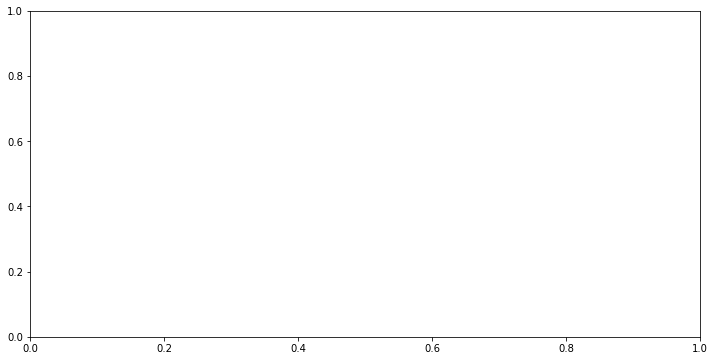

In [20]:
fig, ax = plt.subplots(1, sharex=True)
fig.set_size_inches(12, 6)

Now, let's add our axis labels!

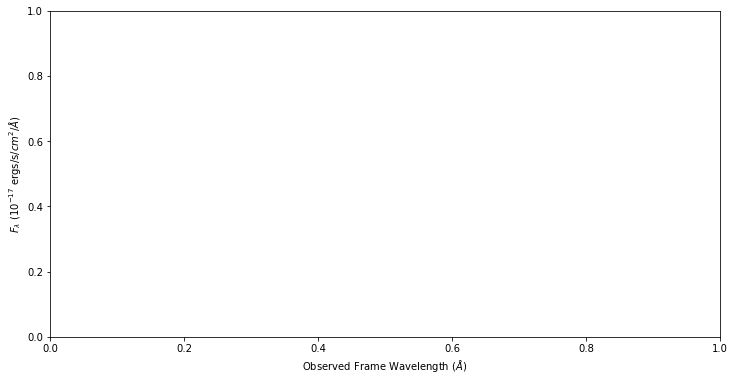

In [21]:
ax.set(
    ylabel = r"$F_{\lambda}$ ($10^{-17}$ ergs/s/$cm^{2}$/$\AA$)",
    xlabel = r'Observed Frame Wavelength ($\AA$)',
)
fig

So, we've labeled the y-axis as flux ($F_{\lambda}$) and put the units next to it! We have also labeled the x-axis as the observed-frame wavelength with the angstrom symbol next to it!

Now, let's put our data on the plot and see what we get!

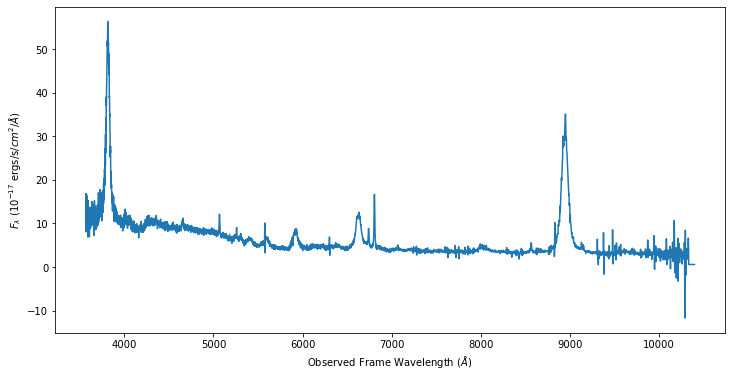

In [22]:
ax.plot(wavelength, flux)
fig

It looks really good!! But what about the uncertainty in the observations at each point? That's where **IVAR** comes into play! 

Ivar is short for inverse-variance!

and Ivar = $\frac{1}{\sigma^{2}}$ where ${\sigma}$ is the uncertainty.

Therefore, in order to calculate uncertainty, we need to do the following:

$\sigma$ = $\frac{1}{\sqrt{ivar}}$

In [23]:
import numpy as np #a package in python that has a suite of mathematical operations and ways to manipulate arrays.

uncertainty = 1 / np.sqrt(ivar)

/Users/loganfries/opt/anaconda3/envs/astroconda/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


So, we get a warning about dividing by zero! That is because if we look at the ivar array, we will see that there are some zero values within it!

In [24]:
ivar

array([0.30019125, 0.2584076 , 0.22675203, ..., 0.        , 0.        ,
       0.        ], dtype=float32)

So, when we are computing uncertainty, we are accidentally dividing by zero!! In the cases where there are zero values for the inverse-variance, those uncertainty values will also be zero! So to get around this, let's replace every zero value in the ivar array with a $10^{-6}$ since that is close to zero, but we can also divide by it without running into any issues! But, then we will have uncertainties with ~1000 since 1 / $\sqrt{10^{-6}}$ is around 1000! So, we will need to get rid of values greater than 900 in the uncertainty array when it's all said and done!

In [25]:
ivar[ivar == 0] = 10**-6 #This replaces every instance of zero within ivar with 10^-6

In [26]:
ivar

array([3.0019125e-01, 2.5840759e-01, 2.2675203e-01, ..., 1.0000000e-06,
       1.0000000e-06, 1.0000000e-06], dtype=float32)

So, we've successfully changed each value of zero within the inverse-variance array with $10^{-6}$! So, now when we calculate the uncertainty, we will not be dividing by zero!

In [27]:
uncertainty = 1 / np.sqrt(ivar)
uncertainty

array([  1.8251603,   1.9671947,   2.1000247, ..., 999.99994  ,
       999.99994  , 999.99994  ], dtype=float32)

And now we get no divide by zero warning! But, we do have 999.99994 for values of uncertainty in places! We need to get rid of those and just make them zero!

In [28]:
uncertainty[uncertainty > 900] = 0
uncertainty

array([1.8251603, 1.9671947, 2.1000247, ..., 0.       , 0.       ,
       0.       ], dtype=float32)

So, we got rid of the high uncertainty values! Great! 

Next, let's add the uncertainty to the spectra that we created! To do this, we want to visualize the uncertainty above the data and below the data! So, we need to create two arrays with:

```Python
belowUncertainty = flux - uncertainty
aboveUncertainty = flux + uncertainty
```

In [29]:
belowUncertainty = flux - uncertainty
aboveUncertainty = flux + uncertainty

In [30]:
ax.plot(wavelength, belowUncertainty, c = 'grey', alpha = 0.3)
ax.plot(wavelength, aboveUncertainty, c = 'grey', alpha = 0.3)

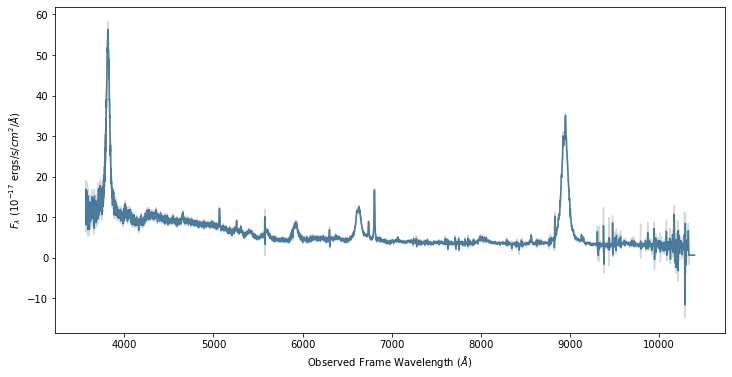

In [31]:
fig


So, we see that the faint grey lines are the uncertainty added to the flux (above the blue line) and subtracted from the flux (below the blue line)!

## Models and Fitting

Next, we are going to talk about models and fitting! Out of all the python packages to fit data, I find that AstroPy's is the best and most intuitive!

As always, let's start by importing what we need!

In [32]:
from astropy.modeling import models, fitting

Now, let's start with a simple example fitting the following line

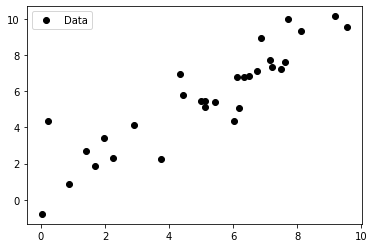

In [33]:
# Initialize a figure.
fig, ax = plt.subplots()

# Define a model for a line
line_orig = models.Linear1D(slope=1.0, intercept=0.5)

# Generate x, y data non-uniformly spaced in x
# Add noise to y measurements
npts = 30
np.random.seed(10)
x = np.random.uniform(0.0, 10.0, npts)
y = line_orig(x)
yunc = np.absolute(np.random.normal(0.5, 2.5, npts))
y += np.random.normal(0.0, yunc, npts)


####### Can ignore the above, as it's just creating fake data #######

ax.plot(x, y, 'ko', label='Data')
ax.legend()

So, there is what we are going to call our data. Now, we want to create a best fit for the line in the form of 

y = mx + b

To do that, we want to initialize the following:

In [34]:
# Initialize a linear fitter
fit = fitting.LinearLSQFitter()

# Initialize a linear model
line_init = models.Linear1D()

# Fit the data with the fitter
fitted_line = fit(line_init, x, y)

Now, we have our fit in the variable fitted_line. Let's see what is the output when we call 'fitted_line'

In [35]:
fitted_line

<Linear1D(slope=0.94034445, intercept=0.86951285)>

So, it gives us the slope (m) and intercept (b) of the equation

y = mx + b

Now, let's plot the line and see how it stacks up to the data we created...

In [36]:
ax.plot(x, fitted_line(x), 'b-', label='Fitted Model')
ax.legend()

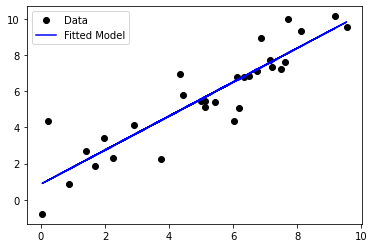

In [37]:
fig

It looks pretty good! We can use AstroPy to fit a wide range of functions and fitting equations! See more at:

https://docs.astropy.org/en/stable/modeling/index.html

## Cosmological Calculations 

Another useful funciton of AstroPy is to use it for cosmological calculations! As always, we want to start by importing the relevant packages!

In [38]:
from astropy.cosmology import WMAP9 as cosmo

Now, let's see what the Hubble Constant $H_{0}$ is within AstroPy's cosmology!

In [41]:
cosmo.H0

<Quantity 69.32 km / (Mpc s)>

So, it's 69.32 $km$ $Mpc^{-1}$ $s^{-1}$. This data comes from the nine-year WMAP results! However, we want to create our own cosmology and do cosmological calculations with that! To do that we need to do the following:

In [42]:
from astropy.cosmology import FlatLambdaCDM

In [43]:
cosmo = FlatLambdaCDM(H0 = 70, Om0 = 0.3)

Here we are creating our 'cosmo' by initializing a **flat** ($\Omega_{k}$ = 0), **lambda CDM (Cold Dark Matter)** ($\Omega_{\Lambda}$ = 0.7) and we are giving it the Hubble Parameter ($H_{0}$) and the energy density due to matter ($\Omega_{m}$). For our purposes, we want these values to be $H_{0}$ = 70 and $\Omega_{m}$ = 0.3. Now, we can calculate a myriad of things like: comoving distance, luminosity distance, look-back time, etc!

Let's calculate comoving distance as a function of redshift and then see what the resultant plot looks like!

Let's first start by creating an array of redshifts that we can put into the function for comoving distance

In [53]:
z = np.arange(0.0001, 100, 0.0001)

# This creates an array. It starts with the first argument: 0.0001 and then ends with the second argument: 100
# and it spaces each element out by the third argument: 0.0001.
# So our array will look like:
# [0.0001, 0.0002, 0.0003, ..., 100]

Now that we have a wide range of redshifts to put into our function, let's initialize it!

In [56]:
cosmo.comoving_distance(z)

<Quantity [4.28265304e-01, 8.56511334e-01, 1.28473809e+00, ...,
           1.25987315e+04, 1.25987323e+04, 1.25987331e+04] Mpc>

So, this will give us an array that is the same length of *z*, but is the comoving distance! As you can see by the end of the array, the units are in Mpc! Now, let's plot this!

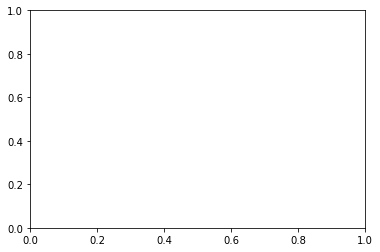

In [57]:
# Initialize a figure.
fig, ax = plt.subplots()

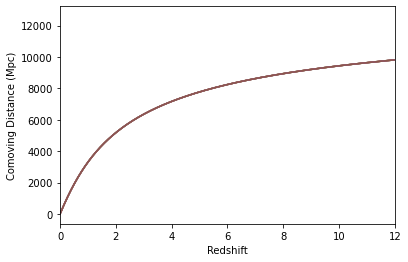

In [65]:
ax.plot(z, cosmo.comoving_distance(z))

# Create x and y axis labels
ax.set_xlabel('Redshift')
ax.set_ylabel('Comoving Distance (Mpc)')

# Constrain the x-axis to 0-12
ax.set_xlim(0, 12)

fig

For more information about cosmological calculations with AstroPy, visit:

https://docs.astropy.org/en/stable/cosmology/index.html

For more information about AstroPy in general, visit the documentation page:

https://docs.astropy.org/en/stable/index.html